In [1]:
from pandas import read_csv
import pandas as  pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset=pd.read_csv(r'your_path/dataset2.csv')
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]


In [5]:
dataset

,x,y
0,0.684160,13.740372
1,0.000361,14.011864
2,0.549993,13.961843
3,0.375798,14.620038
4,0.073580,14.824662
...,...,...
995,0.253179,15.129985
996,0.103039,14.995572
997,0.347782,14.818604
998,0.714970,13.731271


Degree: 1, Features: 2
Mean Squared Error: 0.5738987644530381
R2 Score: 0.22589426982864946


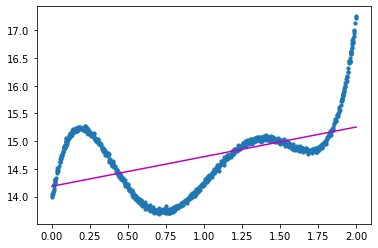

Degree: 2, Features: 3
Mean Squared Error: 0.38188332820239246
R2 Score: 0.6572392373174787


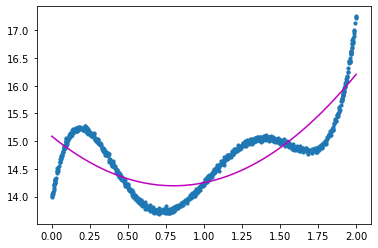

Degree: 3, Features: 4
Mean Squared Error: 0.3800068882275519
R2 Score: 0.6605993727005718


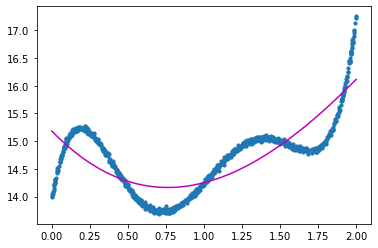

Degree: 4, Features: 5
Mean Squared Error: 0.37996106589009515
R2 Score: 0.6606812195980799


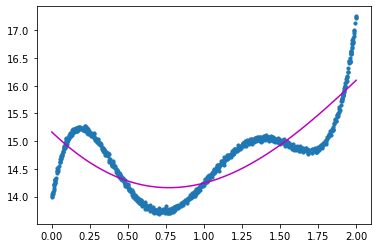

Degree: 5, Features: 6
Mean Squared Error: 0.02571789131560035
R2 Score: 0.998445465316746


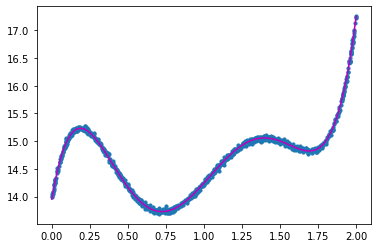

Degree: 6, Features: 7
Mean Squared Error: 0.025704507127837166
R2 Score: 0.9984470829276006


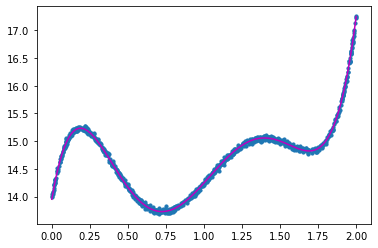

Degree: 7, Features: 8
Mean Squared Error: 0.02569934103450067
R2 Score: 0.9984477070756006


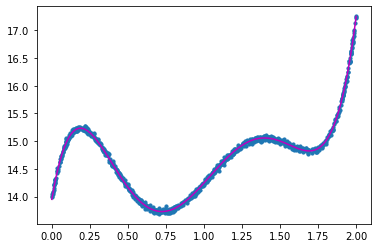

Degree: 8, Features: 9
Mean Squared Error: 0.025682656487227208
R2 Score: 0.9984497219831004


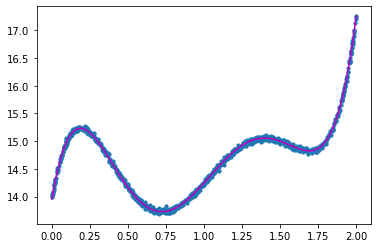

Degree: 9, Features: 10
Mean Squared Error: 0.02568212119125644
R2 Score: 0.9984497866063943


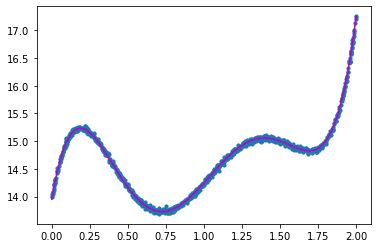

Degree: 10, Features: 11
Mean Squared Error: 0.025667464979288717
R2 Score: 0.998451555445732


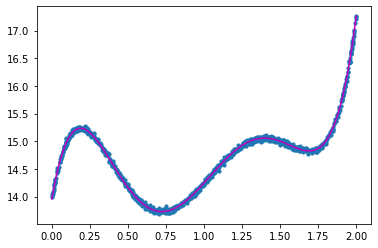

Degree: 11, Features: 12
Mean Squared Error: 0.025656291623814165
R2 Score: 0.9984529032652939


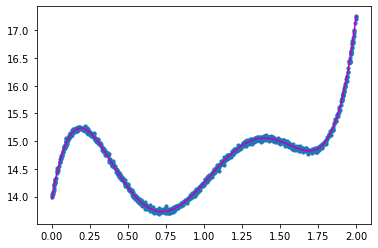

Degree: 12, Features: 13
Mean Squared Error: 0.025639883609452237
R2 Score: 0.9984548814676487


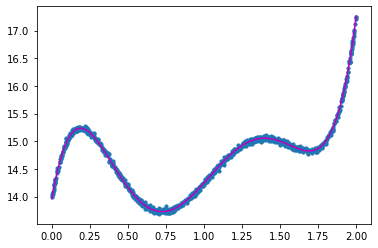

Degree: 13, Features: 14
Mean Squared Error: 0.02563982676760423
R2 Score: 0.998454888318483


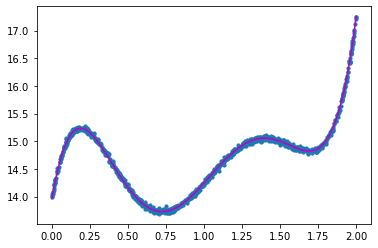

Degree: 14, Features: 15
Mean Squared Error: 0.025619817818558058
R2 Score: 0.9984572989430135


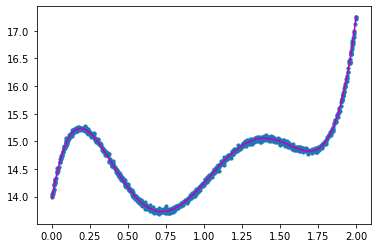

Degree: 15, Features: 16
Mean Squared Error: 0.02560370418569782
R2 Score: 0.9984592389022448


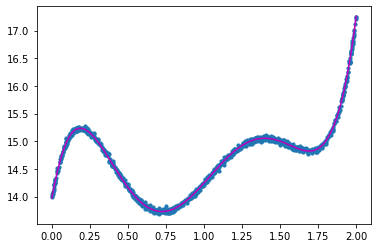

In [6]:
# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 16)]

models = []

for d in degress:
 # create transform
    trans = PolynomialFeatures(degree=d)
 
 # fit and transform
    data = trans.fit_transform(X)

    # record number of features
    num_features.append(data.shape[1])

    # summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1]))
    x = X
    polynomial_features= PolynomialFeatures(degree=d)
    
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression(fit_intercept = False)
    model.fit(x_poly, y)
    
    models.append(model)
    
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    
    r2 = r2_score(y,y_poly_pred)
    
    print('Mean Squared Error:',rmse)
    print("R2 Score:",r2)

    plt.scatter(x, y, s=10)
# sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.show()

# plot degree vs number of features
#pyplot.plot(degress, num_features)


#pyplot.show()


we can see that after the degree 5 model have similar results. Thus, we can choose degree 5 for our model with Degree: 5, Features: 6, Mean Squared Error: 0.02571789131560035, R2 Score: 0.998445465316746¶

In [7]:
# coefs of degree 5
coefs = models[4].coef_
coefs

array([ 13.94804386,  16.12082625, -64.37365209,  88.50261294,
       -49.94090174,   9.98741703])

we have function y = f(x)=c0 + c1x + c2x^2 + c3x^3 + c4x^4 + c5*x^5 with degree 5. We have coeficients 13.94804386, 16.12082625, -64.37365209, 88.50261294, -49.94090174, 9.98741703. respectively c0, c1, c2, c3, c4, c5.